## Quiz 4 -- Practice Final Exam -- Solutions

This is the final exam from 2016.  It was originally a 3 hour exam.  We will give you 80 minutes in class -- this should be enough time to get started on the problem and to give you a sense for how you need to pace yourself.  Solutions will be posted on Monday night, once the grading script has stopped at **11:59pm**. Feel free to finish the exam during the day, and compare your answers with the solution key. 

**Instructions** You are encouraged to use any material from the course, such as your own work and class notebooks. You are also free to use standard on-line resources such as Python reference manuals.  You must do all the work on your own, i.e. no consulting with fellow students or with people on-line.  Once you have completed your exam, push your notebook to your BitBucket repository. Store this quiz in **mp248/Quizzes/Quiz.4.ipynb**. 

**This will be graded only as a small task** and it will be graded by a script only, so the grading will be incomplete.  Check your feedback in CourseSpaces to see how your progress is evaluated.

**Final Exam Problem Setup**

We have two billiard balls $A$ and $B$, constrained to move along a frictionless line $x \geq 0$. There is no gravity.  At position $x=0$ is an immovable elastic wall.  Billiard $A$ has mass $m_A$. Billiard $B$ has mass $m_B$.

<img src="F.Q1.Setup.png" /img>

The initial position of billard $A$ is $x=1$. The initial position of billiard $B$ is at $x=2$. 

As the wall is completely elastic, when billiard $A$ collides with the wall, its velocity instantaneously reverses, i.e. $v_A' = - v_A$. *Here the prime indicates the velocity after the collision, not the derivative*. 

When billiard $A$ and $B$ collide, the new velocity of billiard $A$ and $B$ are given by:

$$v_A' = \frac{m_A-m_B}{m_A+m_B}v_A + \frac{2m_B}{m_A+m_B}v_B$$
$$v_B' = \frac{m_B-m_A}{m_A+m_B}v_B + \frac{2m_A}{m_A+m_B}v_A$$

Thus provided $m_B > m_A$ billiard $A$ with undergo a sequence of velocity sign changes as it collides with billiard $B$ and the wall, in succession, until billiard $B$ escapes (to the right) at a larger velocity than billiard $A$. 

**Problem 1:**

Write an algorithm that takes as input the initial velocity of billiard $A$, $B$, and the masses
of billiards $A$ and $B$ respectively.  The output will be a pair $(c_1,c_2)$ where $c_1$ is the number of  collisions billiard $A$ makes with the wall, and $c_2$ is the number of collisions billiard $A$ makes with billiard $B$, before $B$ escapes to the right. 
 
<img src="F.Q1.Context.png" /img>

Note, the radius of the billiards is not relevant for any of the problems in this notebook. 

In [1]:
## returns pair collisions with wall, collisions of balls. 
def collCount( va, vb, ma, mb ):
    varr = [ [va, vb] ]
    ## loop until "escape" which is vb>=va>=0
    while (va < 0.0) or (vb<va):
        ## decide which collision type.
        if (va<0.0):
            va = -va
        else:
            nva = (ma-mb)*va/(ma+mb) + (2.0*mb*vb)/(ma+mb)
            nvb = (mb-ma)*vb/(ma+mb) + (2.0*ma*va)/(ma+mb)
            va = nva
            vb = nvb
        varr.append( [va, vb] )
    ca, cb = 0, 0
    ## collisions are separators between varr elements, so let's ignore the last element
    for i in range(len(varr)-1):
        if varr[i][0]<0.0:
            ca += 1
        else:
            cb += 1
    return ca, cb

for i in range(6):
    mb = 10**i
    print(collCount(0.0, -1.0, 1.0, mb))


(1, 2)
(5, 5)
(15, 16)
(49, 50)
(157, 157)
(496, 497)


**Problem 2: **

For $m_A=1$ and $m_B = 10^2, 10^4, 10^6, \cdots $, let the initial velocity of 
billiard $A$ be zero and the initial velocity of billiard $B$ be $-1$. 

Print out: 

    a) The number of collisions of A with the wall. 
    b) The number of collisions of B with A. 
    c) The total number of collisions of all types, i.e. (a)+(b). 

In [2]:
for i in range(7):
    mb = 10**(2*i)
    ca, cb = collCount(0.0, -1.0, 1.0, mb)
    print("mb == 10^", 2*i, ' ca ', ca, ' cb ', cb, ' tot ', ca+cb, sep='')

mb == 10^0 ca 1 cb 2 tot 3
mb == 10^2 ca 15 cb 16 tot 31
mb == 10^4 ca 157 cb 157 tot 314
mb == 10^6 ca 1570 cb 1571 tot 3141
mb == 10^8 ca 15707 cb 15708 tot 31415
mb == 10^10 ca 157079 cb 157080 tot 314159
mb == 10^12 ca 1570796 cb 1570796 tot 3141592


You should begin to see a pattern in your answer to Problem 2. 

**Problem 3: **

Infer a function $f(m_B)$ so that the limit

$$\lim_{m_B \to \infty} \frac{coll(m_B)}{f(m_B)} = L$$

exists, with $L \neq 0$.  

$coll(m_B)$ is the sum of the number of collisions between $A$ and $B$, as well as $A$ and the wall, i.e. the answer to 2(c). 

In [3]:
import math as ma
## f(x) = sqrt(x)

for i in range(7):
    mb = 10**(2*i)
    ca, cb = collCount(0.0, -1.0, 1.0, mb)
    print("mb == 10^", 2*i, ' tot/f ', (ca+cb)/ma.sqrt(mb), sep='')

mb == 10^0 tot/f 3.0
mb == 10^2 tot/f 3.1
mb == 10^4 tot/f 3.14
mb == 10^6 tot/f 3.141
mb == 10^8 tot/f 3.1415
mb == 10^10 tot/f 3.14159
mb == 10^12 tot/f 3.141592


**Problem 4: **

To demonstrate how quickly $coll(m_B)/f(m_B)$ converges to $L$, create a plot consisting of:

    1) A horizontal line at height L. 
    2) coll(m_B)/f(m_B) for m_B=1, 10, 10^2, 10^3, 10^4, 10^5, 10^6. 

Perhaps your x-coordinate should be $n$ where $m_B=10^n$.  Make the horizontal line (1) a different colour from (2).

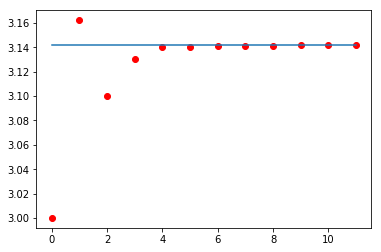

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [i for i in range(12)]
y = [sum(collCount(0.0, -1.0, 1.0, 10**xi))/ma.sqrt(10**xi) for xi in x]

plt.plot(x,y, 'ro')
plt.plot([x[0], x[-1]], [ma.pi, ma.pi])

**Problem 5:**

Write an algorithm that takes as input any initial masses, positions and initial velocities and outputs a (matplotlib) plot like the one below, which depicts the path both mass $A$ and $B$ take, including all collisions. 

<img src="F.Q1.Context.png" /img>

Execute and include the output from the case $v_a = 0.0, v_b = -1.0, m_a=1.0, m_b=10.0$.


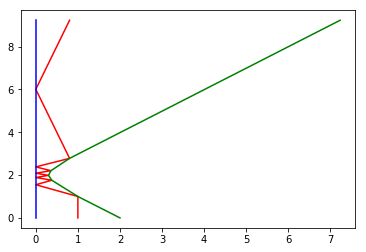

In [18]:
## returns list of positions and times, I suppose. 
## tlist, xalist, xblist. 
def collPos( va, vb, ma, mb ):
    varr = [ [va, vb] ]
    tl = [0.0]
    xal = [1.0]
    xbl = [2.0]
    
    ## loop until "escape" which is vb>=va>=0
    while (va < 0.0) or (vb<va):
        ## decide which collision type.
        if (va<0.0):
            dt = -xal[-1]/va
            tl.append(tl[-1] + dt)
            xal.append(xal[-1] + dt*va)
            xbl.append(xbl[-1] + dt*vb)
            
            va = -va
        else:
            dt = (xbl[-1]-xal[-1])/(va-vb)
            tl.append(tl[-1] + dt)
            xal.append(xal[-1] + dt*va)
            xbl.append(xbl[-1] + dt*vb)
            
            nva = (ma-mb)*va/(ma+mb) + (2.0*mb*vb)/(ma+mb)
            nvb = (mb-ma)*vb/(ma+mb) + (2.0*ma*va)/(ma+mb)
            va = nva
            vb = nvb
        varr.append( [va, vb] )
        
    ## throw in one more location and time...
    dt=tl[-1]-tl[-2]
    tl.append(tl[-1] + dt)
    xal.append(xal[-1] + dt*va)
    xbl.append(xbl[-1] + dt*vb)

    return tl, xal, xbl

tl, xal, xbl = collPos( 0.0, -1.0, 1.0, 10 )
plt.plot( xal, tl, 'r-')
plt.plot( xbl, tl, 'g-')
plt.plot([0.0, 0.0], [min(tl), max(tl)], 'b-')